In [ ]:
# Computer vision: 3D data structure - point clouds and render them - segementation of diff kind of objects and reconstruct envoronment using point clouds and open3D - rmv noise artifacts outliers - mapping segmentation
# reconstruction - surface alignamnet - 3d visualization
# open 3d ml -
# point clouds (=collectoin of points that represents an object) -> 3d meshes & 3d models
# generate pc: 3d laser scanners -LiDAR
# 3D mesh (from point cloud): structural build or a structural base of a 3d model - mesh is a collection of vertices edges and faces that decides that 3d model height width and depth
# 3D model: 3d image : give whole info like texture color reflectivity light

! pip install open3D


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 94.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.9 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
! pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=31862bb3a2d5ae1b93acdbbd9a346230abd4ba9a4bac6b877009deed6bba3756
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import open3d as o3d
import numpy as np
import os
import sys


import wget
url = 'https://raw.githubusercontent.com/PointCloudLibrary/pcl/master/test/bunny.pcd'
#filename = wget.download(url)

pcd = o3d.io.read_point_cloud("bunny.pcd")
# pcd is point cloud data
print(pcd)

PointCloud with 397 points.


In [ ]:
#The code below writes a point cloud.

o3d.io.write_point_cloud("copy_of_bunny.pcd", pcd)

True

In [ ]:
pcd = o3d.io.read_point_cloud("sample.xyz", format='xyz')
print(pcd)

[Open3D WARNING] Read XYZ failed: unable to open file: sample.xyz
PointCloud with 0 points.


In [ ]:
# MESH: pls polygon file format
# The code below reads and writes a mesh.
print("Testing IO for meshes ...")

#Function to read TriangleMesh from file
mesh = o3d.io.read_triangle_mesh("knot.ply")
print(mesh)

Testing IO for meshes ...
TriangleMesh with 1440 points and 2880 triangles.


In [ ]:
import open3d as o3d
import numpy as np
import PIL.Image
import IPython.display
import os
import urllib
import tarfile
import gzip
import zipfile
import shutil

#Download the point cloud using below command
import wget
url = 'http://graphics.stanford.edu/pub/3Dscanrep/bunny.tar.gz'
#filename = wget.download(url)

In [ ]:
bunny_path = "bunny"
with tarfile.open(bunny_path + ".tar.gz") as tar:
            tar.extractall(path=os.path.dirname(bunny_path))

In [ ]:
bunny_path = "/content/bunny/reconstruction/bun_zipper.ply"
mesh = o3d.io.read_triangle_mesh(bunny_path)
mesh.compute_vertex_normals()

TriangleMesh with 35947 points and 69451 triangles.

In [ ]:
# Sample points uniformly from the mesh
pcd = mesh.sample_points_uniformly(number_of_points=500)
# Save the resulting mesh
o3d.io.write_triangle_mesh("sampled_mesh.ply", mesh)
o3d.io.write_point_cloud("sampled_point_cloud.pcd", pcd)

True

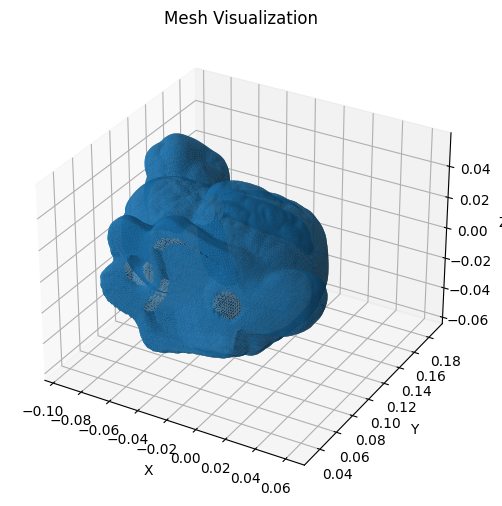

In [ ]:
import matplotlib.pyplot as plt
# Sample points uniformly from the mesh
pcd = mesh.sample_points_uniformly(number_of_points=500)
'''
# Visualize the mesh using matplotlib
if isinstance(pcd, o3d.geometry.PointCloud):
    points = np.asarray(pcd.points)
    plt.figure(figsize=(8, 6))
    plt.scatter(points[:, 0], points[:, 1], s=0.1)  # Adjust the marker size as needed
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Point Cloud Visualization")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
'''
# If you're working with a mesh
if isinstance(mesh, o3d.geometry.TriangleMesh):
    vertices = np.asarray(mesh.vertices)
    triangles = np.asarray(mesh.triangles)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=triangles)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title("Mesh Visualization")
    plt.show()

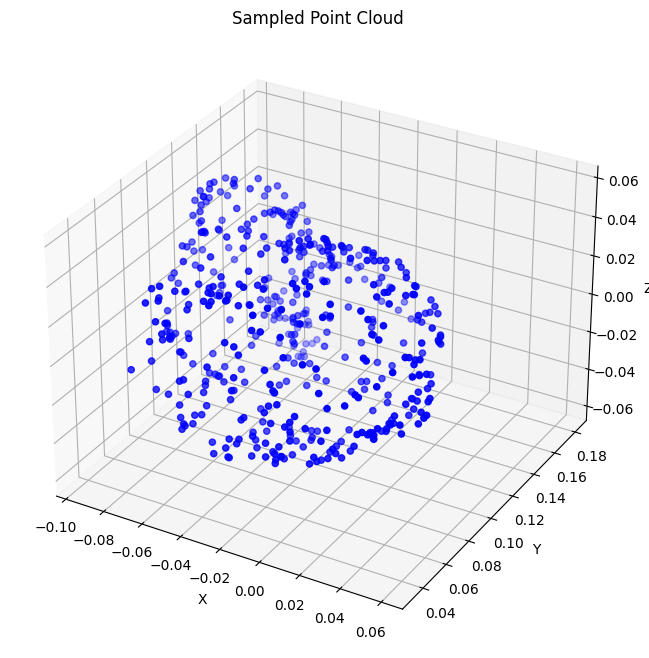

In [ ]:

# Visualize the sampled point cloud using matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, z coordinates from the point cloud
points = np.asarray(pcd.points)

# Plot the point cloud
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o')

# Set plot labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Sampled Point Cloud')

# Show plot
plt.show()

In [ ]:
#Download the Happy Buddha dataset
#Source: Stanford University Computer Graphics Laboratory

In [ ]:
#Download the Happy Buddha dataset
import wget
url = 'http://graphics.stanford.edu/pub/3Dscanrep/happy/happy_recon.tar.gz'
filename = wget.download(url)

In [ ]:
budha_path = "happy_recon"
with tarfile.open(budha_path + ".tar.gz") as tar:
            tar.extractall(path=os.path.dirname(budha_path))

budha_path = "/content/happy_recon/happy_vrip.ply"
mesh_budha = o3d.io.read_triangle_mesh(budha_path)
mesh_budha.compute_vertex_normals()

TriangleMesh with 543652 points and 1087716 triangles.

In [ ]:
# Sample points uniformly from the mesh
pcd_budha = mesh_budha.sample_points_uniformly(number_of_points=500)
# Save the resulting mesh
o3d.io.write_triangle_mesh("budha_mesh.ply", mesh_budha)


True

In [ ]:
import wget
url = 'http://graphics.stanford.edu/pub/3Dscanrep/dragon/dragon_recon.tar.gz'
filename = wget.download(url)
dragon_path = "dragon_recon"
with tarfile.open(dragon_path + ".tar.gz") as tar:
            tar.extractall(path=os.path.dirname(dragon_path))

dragon_path = "/content/dragon_recon/dragon_vrip.ply"
mesh_dragon = o3d.io.read_triangle_mesh(dragon_path)
mesh_dragon.compute_vertex_normals()

# Sample points uniformly from the mesh
pcd_dragon = mesh_dragon.sample_points_uniformly(number_of_points=500)
# Save the resulting mesh
o3d.io.write_triangle_mesh("mesh_dragon.ply", mesh_dragon)

True

In [ ]:
#Voxel downsampling
#1- It is a preprocessing step for point cloud processing tasks.
#2- It takes the point clouds and downsample.
#3- Points which are in 1 voxels are averaged and we get 1 point after averaging.
#Why downsampling? It makes the data of a more manageable size
#Reduces the dimensionality of the data thus enabling in faster processing of the data (image)
#Reducing the storage size of the data
print("Downsample the point cloud with a voxel of 0.05")
downpcd = pcd_dragon.voxel_down_sample(voxel_size=0.05)
o3d.visualization.draw_geometries([downpcd],width=1920, height=1080, left=50, top=50)


Downsample the point cloud with a voxel of 0.05
[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [ ]:
import numpy as np
print("Load a ply point cloud, print it, and render it")

#read_point_cloud reads a point cloud from a file. It tries to decode the file based on the extension name.
pcd = o3d.io.read_point_cloud("fragment.ply")
print(pcd)
print(np.asarray(pcd.points))

#draw_geometries visualizes the point cloud.
o3d.io.write_point_cloud("point_cloud.ply", pcd)



Load a ply point cloud, print it, and render it
PointCloud with 196133 points.
[[0.65234375 0.84686458 2.37890625]
 [0.65234375 0.83984375 2.38430572]
 [0.66737998 0.83984375 2.37890625]
 ...
 [2.00839925 2.39453125 1.88671875]
 [2.00390625 2.39488506 1.88671875]
 [2.00390625 2.39453125 1.88793314]]


True